In [200]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import hvplot.pandas
import pandas as pd
import requests
import scipy.stats as st
import os 
import csv
# File to Load 
FINAL_CSV_PATH = os.path.join("filtered_database.csv")

In [201]:
# Read the csv file
masterfile_df = pd.read_csv(FINAL_CSV_PATH)
masterfile_df.head()

,CBSA,CBSA_Name,CBSA_POP,CBSA_EMP,CBSA_WRK,Perc_Local_wrk,Ac_Total,Ac_Unpr,P_WrkAge,AutoOwn0,...,R_LowWageWk,R_MedWageWk,R_HiWageWk,TotEmp,D1B,D1C,D4A,D5AR,NatWalkInd,levels of walkability
0,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,51.444490,50.313740,0.705,26,...,84,120,181,11,26.791886,0.218628,962.92,661739,10.500000,below average walkable
1,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,1025.230008,960.425575,0.560,12,...,151,128,653,282,1.632610,0.293620,944.15,140212,9.500000,below average walkable
2,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,1423.857411,1252.374073,0.557,13,...,165,217,473,4012,1.484381,3.203516,839.54,158876,13.000000,above average walkable
3,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,485.497632,433.369860,0.630,0,...,280,375,908,210,8.948476,0.484575,-99999.00,153467,5.833333,below average walkable
4,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,148.564674,147.595085,0.626,0,...,92,91,315,194,4.674952,1.314407,968.29,278458,14.666667,above average walkable


In [202]:
# Create a new column to show the portion of the total land that is available for development
perc_unpr_column = ((masterfile_df['Ac_Unpr'] / masterfile_df['Ac_Total']) * 100).round(1).rename('Perc_Unpr')
gross_population_column = ((masterfile_df['Ac_Unpr'] * masterfile_df['D1B'])).round(1).rename('Gross_Population')
gross_employment_column = ((masterfile_df['Ac_Unpr'] * masterfile_df['D1C'])).round(1).rename('Gross_Employment')
perc_unpr_column.head()
gross_population_column.head()
gross_employment_column.head()

0      11.0
1     282.0
2    4012.0
3     210.0
4     194.0
Name: Gross_Employment, dtype: float64

In [203]:
# Density and Area Select columns
density_area_df = pd.concat([
    masterfile_df[['CBSA', "CBSA_Name"]],
    gross_population_column, gross_employment_column,
    masterfile_df[["Ac_Total", "Ac_Unpr"]],
    perc_unpr_column, 
    masterfile_df[["D1B", "D1C", "NatWalkInd"]]
], axis = 'columns')
density_area_df.head()

,CBSA,CBSA_Name,Gross_Population,Gross_Employment,Ac_Total,Ac_Unpr,Perc_Unpr,D1B,D1C,NatWalkInd
0,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",1348.0,11.0,51.444490,50.313740,97.8,26.791886,0.218628,10.500000
1,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",1568.0,282.0,1025.230008,960.425575,93.7,1.632610,0.293620,9.500000
2,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",1859.0,4012.0,1423.857411,1252.374073,88.0,1.484381,3.203516,13.000000
3,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",3878.0,210.0,485.497632,433.369860,89.3,8.948476,0.484575,5.833333
4,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",690.0,194.0,148.564674,147.595085,99.3,4.674952,1.314407,14.666667


In [204]:
# Finding sum of Gross Population and Total Unprotected Land Area, grouped by CBSA
gr_popn_group_df = density_area_df.groupby('CBSA_Name')
gr_popn_sum_df = gr_popn_group_df.sum()[['Gross_Population', 'Ac_Unpr']].round(1)
gr_popn_sum_df['Population_Density'] = (gr_popn_sum_df['Gross_Population'] / gr_popn_sum_df['Ac_Unpr']).round(1)
sorted_gr_popn_df = gr_popn_sum_df.sort_values('Gross_Population', ascending=False)
sorted_gr_popn_df = sorted_gr_popn_df.reset_index()
sorted_gr_popn_df.head(27)

,CBSA_Name,Gross_Population,Ac_Unpr,Population_Density
0,"New York-Newark-Jersey City, NY-NJ-PA",19314309.2,3454749.6,5.6
1,"Buffalo-Cheektowaga, NY",1131570.0,955404.1,1.2
2,"Rochester, NY",1074667.0,2002308.2,0.5
3,"Albany-Schenectady-Troy, NY",880481.0,1713310.7,0.5
4,"Poughkeepsie-Newburgh-Middletown, NY",672121.0,937537.9,0.7
5,"Syracuse, NY",654571.0,1426997.5,0.5
6,"Utica-Rome, NY",293287.0,1279370.0,0.2
7,"Binghamton, NY",243447.0,765954.2,0.3
8,"Kingston, NY",179303.0,513346.8,0.3
9,"Jamestown-Dunkirk-Fredonia, NY",129656.0,653924.5,0.2


In [205]:
# Finding the Population Density, grouped by CBSA
gr_popn_pd_df = density_area_df.groupby('CBSA_Name')
gr_popn_pd_sum_df = gr_popn_pd_df.sum()[['Gross_Population', 'Ac_Unpr']].round(1)
gr_popn_pd_sum_df['Population_Density'] = (gr_popn_pd_sum_df['Gross_Population'] / gr_popn_pd_sum_df['Ac_Unpr']).round(1)
sorted_gr_popn_pd_df = gr_popn_pd_sum_df.sort_values('Population_Density', ascending=False)
sorted_gr_popn_pd_df = sorted_gr_popn_pd_df.reset_index()


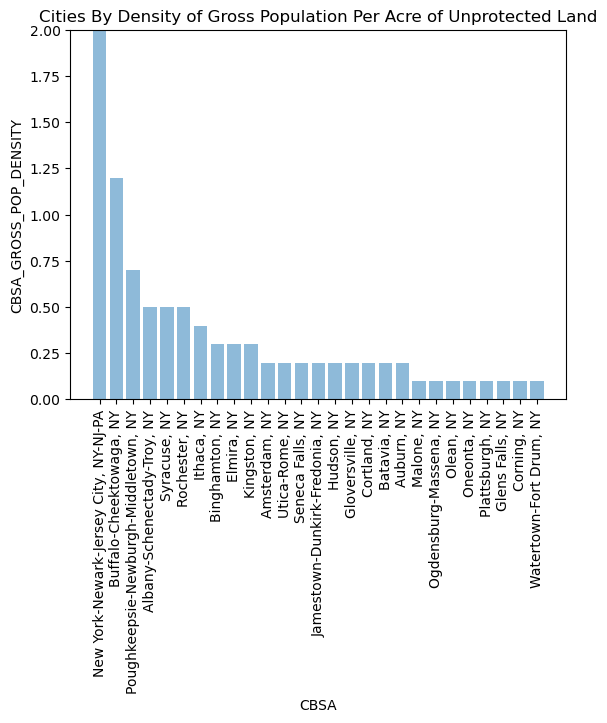

In [206]:
# Bar of Population Density
x_values = sorted_gr_popn_pd_df['CBSA_Name']
y_values = sorted_gr_popn_pd_df['Population_Density']
plt.bar(x_values, y_values, alpha=0.5, align="center")
plt.xticks(rotation=90)
plt.xlabel("CBSA")
plt.ylabel("CBSA_GROSS_POP_DENSITY")
plt.title("Cities By Density of Gross Population Per Acre of Unprotected Land")
plt.ylim(0,2)
plt.show()

In [207]:
# Finding sum of Gross Employment and Total Unprotected Land Area, grouped by CBSA
gr_empl_group_df = density_area_df.groupby('CBSA_Name')
gr_empl_sum_df = gr_empl_group_df.sum()[['Gross_Employment', 'Ac_Unpr']].round(1)
gr_empl_sum_df['Employment_Density'] = (gr_empl_sum_df['Gross_Employment'] / gr_empl_sum_df['Ac_Unpr']).round(1)
sorted_gr_empl_df = gr_empl_sum_df.sort_values('Gross_Employment', ascending=False)
sorted_gr_empl_df = sorted_gr_empl_df.reset_index()
sorted_gr_empl_df.head(27)

,CBSA_Name,Gross_Employment,Ac_Unpr,Employment_Density
0,"New York-Newark-Jersey City, NY-NJ-PA",9159103.5,3454749.6,2.7
1,"Buffalo-Cheektowaga, NY",546694.0,955404.1,0.6
2,"Rochester, NY",515048.0,2002308.2,0.3
3,"Albany-Schenectady-Troy, NY",447103.0,1713310.7,0.3
4,"Syracuse, NY",300268.0,1426997.5,0.2
5,"Poughkeepsie-Newburgh-Middletown, NY",248712.0,937537.9,0.3
6,"Utica-Rome, NY",122479.0,1279370.0,0.1
7,"Binghamton, NY",100147.0,765954.2,0.1
8,"Kingston, NY",58003.0,513346.8,0.1
9,"Ithaca, NY",48757.0,271649.7,0.2


In [208]:
# Finding the Employment Density, grouped by CBSA
gr_empl_pd_df = density_area_df.groupby('CBSA_Name')
gr_empl_pd_sum_df = gr_empl_pd_df.sum()[['Gross_Employment', 'Ac_Unpr']].round(1)
gr_empl_pd_sum_df['Employment_Density'] = (gr_empl_pd_sum_df['Gross_Employment'] / gr_empl_pd_sum_df['Ac_Unpr']).round(1)
sorted_gr_empl_pd_df = gr_empl_pd_sum_df.sort_values('Employment_Density', ascending=False)
sorted_gr_empl_pd_df = sorted_gr_empl_pd_df.reset_index()


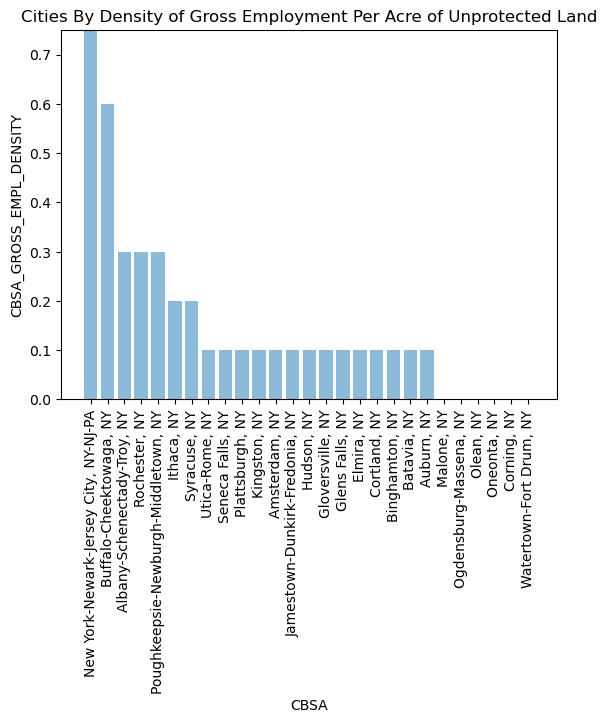

In [209]:
# Bar of Employment Density
x_values = sorted_gr_empl_pd_df['CBSA_Name']
y_values = sorted_gr_empl_pd_df['Employment_Density']
plt.bar(x_values, y_values, alpha=0.5, align="center")
plt.xticks(rotation=90)
plt.xlabel("CBSA")
plt.ylabel("CBSA_GROSS_EMPL_DENSITY")
plt.title("Cities By Density of Gross Employment Per Acre of Unprotected Land")
plt.ylim(0,0.75)
plt.show()

In [211]:
# Group by CBSA
density_area_df_grouped = density_area_df.groupby('CBSA_Name')
density_area_df_grouped.head()

,CBSA,CBSA_Name,Gross_Population,Gross_Employment,Ac_Total,Ac_Unpr,Perc_Unpr,D1B,D1C,NatWalkInd
0,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",1348.0,11.0,51.444490,50.313740,97.8,26.791886,0.218628,10.500000
1,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",1568.0,282.0,1025.230008,960.425575,93.7,1.632610,0.293620,9.500000
2,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",1859.0,4012.0,1423.857411,1252.374073,88.0,1.484381,3.203516,13.000000
3,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",3878.0,210.0,485.497632,433.369860,89.3,8.948476,0.484575,5.833333
4,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",690.0,194.0,148.564674,147.595085,99.3,4.674952,1.314407,14.666667
...,...,...,...,...,...,...,...,...,...,...
10614,27060.0,"Ithaca, NY",1494.0,250.0,3288.110033,3081.322079,93.7,0.484857,0.081134,5.000000
10890,27460.0,"Jamestown-Dunkirk-Fredonia, NY",1381.0,351.0,8717.794006,8712.424770,99.9,0.158509,0.040287,6.666667
15690,12860.0,"Batavia, NY",972.0,191.0,8252.054243,8247.063070,99.9,0.117860,0.023160,3.333333
15699,12860.0,"Batavia, NY",585.0,29.0,1628.548627,1507.533492,92.6,0.388051,0.019237,5.000000


In [212]:
# Finding means grouped by CBSA
d1b_mean_df = density_area_df_grouped.mean()[['D1B', 'NatWalkInd']]
d1b_mean_df.head()

,D1B,NatWalkInd
CBSA_Name,,
"Albany-Schenectady-Troy, NY",6.845659,10.129851
"Amsterdam, NY",2.559262,5.920635
"Auburn, NY",2.866146,7.745614
"Batavia, NY",2.210658,5.812865
"Binghamton, NY",4.800261,6.900937


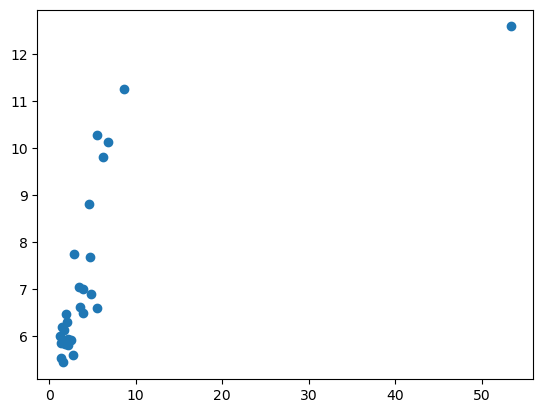

In [213]:
# Scatter plot
d1b_x_values = d1b_mean_df['D1B']
d1b_y_values = d1b_mean_df['NatWalkInd']
plt.scatter(d1b_x_values,d1b_y_values)
plt.show()

The r-square-value is: 0.7718485199544515
The p-value is: 3.6091953313889607e-09


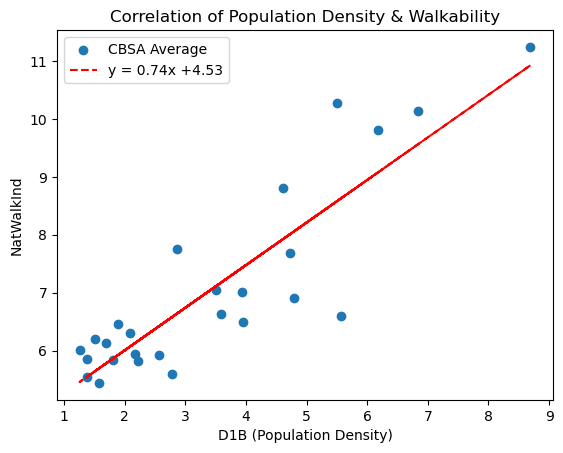

In [214]:
# Adjusting for the one outlier at beyond (50, 12)
d1b_mean_filtered_df = d1b_mean_df[d1b_mean_df["D1B"] < 20]
d1b_x_values = d1b_mean_filtered_df['D1B']
d1b_y_values = d1b_mean_filtered_df['NatWalkInd']
plt.scatter(d1b_x_values, d1b_y_values, label = 'CBSA Average')

# To do regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(d1b_x_values, d1b_y_values)
y_predicted_values = d1b_x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(d1b_x_values, y_predicted_values,"r--", label = line_equation)

plt.xlabel('D1B (Population Density)')
plt.ylabel('NatWalkInd')
plt.title("Correlation of Population Density & Walkability")

print(f"The r-square-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.legend()
plt.show()

In [215]:
# Finding means grouped by CBSA
d1c_mean_df = density_area_df_grouped.mean()[['D1C', 'NatWalkInd']]
d1c_mean_df.head()

,D1C,NatWalkInd
CBSA_Name,,
"Albany-Schenectady-Troy, NY",2.913726,10.129851
"Amsterdam, NY",0.769063,5.920635
"Auburn, NY",1.168152,7.745614
"Batavia, NY",1.089383,5.812865
"Binghamton, NY",2.521653,6.900937


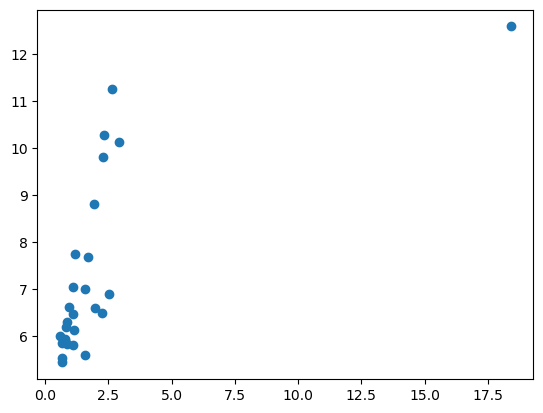

In [216]:
# Scatter plot
d1c_x_values = d1c_mean_df['D1C']
d1c_y_values = d1c_mean_df['NatWalkInd']
plt.scatter(d1c_x_values, d1c_y_values)
plt.show()

The r-square-value is: 0.623110186614976
The p-value is: 1.6405507495263115e-06


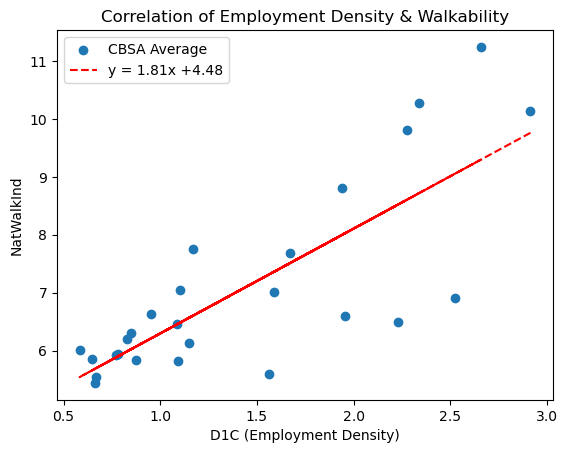

In [217]:
# Adjusting for the one outlier at beyond (17.5, 12)
d1c_mean_filtered_df = d1c_mean_df[d1c_mean_df["D1C"] < 5]
d1c_x_values = d1c_mean_filtered_df['D1C']
d1c_y_values = d1c_mean_filtered_df['NatWalkInd']
plt.scatter(d1c_x_values, d1c_y_values, label = 'CBSA Average')

# To do regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(d1c_x_values, d1c_y_values)
y_predicted_values = d1c_x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(d1c_x_values, y_predicted_values,"r--", label = line_equation)

plt.xlabel('D1C (Employment Density)')
plt.ylabel('NatWalkInd')
plt.title("Correlation of Employment Density & Walkability")

print(f"The r-square-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.legend()
plt.show()

In [218]:
# Finding means grouped by CBSA
ac_unpr_perc_mean_df = density_area_df_grouped.mean()[['Perc_Unpr', 'NatWalkInd']]
ac_unpr_perc_mean_df.head()

,Perc_Unpr,NatWalkInd
CBSA_Name,,
"Albany-Schenectady-Troy, NY",93.628955,10.129851
"Amsterdam, NY",94.854762,5.920635
"Auburn, NY",91.853947,7.745614
"Batavia, NY",94.296491,5.812865
"Binghamton, NY",94.752610,6.900937


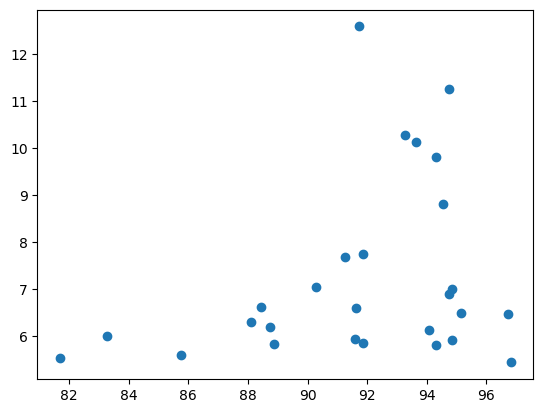

In [219]:
# Scatter plot
ac_unpr_perc_x_values = ac_unpr_perc_mean_df['Perc_Unpr']
ac_unpr_perc_y_values = ac_unpr_perc_mean_df['NatWalkInd']
plt.scatter(ac_unpr_perc_x_values, ac_unpr_perc_y_values)
plt.show()

The r-square-value is: 0.0833760420508127
The p-value is: 0.14409449981235223


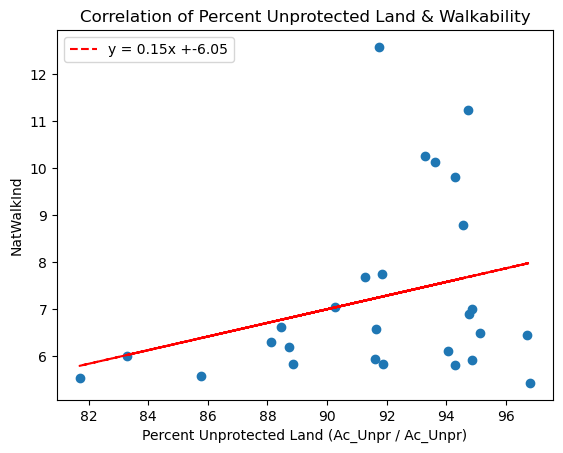

In [220]:
# Scatter plot
ac_unpr_perc_x_values = ac_unpr_perc_mean_df['Perc_Unpr']
ac_unpr_perc_y_values = ac_unpr_perc_mean_df['NatWalkInd']
plt.scatter(ac_unpr_perc_x_values, ac_unpr_perc_y_values)

# To do regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(ac_unpr_perc_x_values, ac_unpr_perc_y_values)
y_predicted_values = ac_unpr_perc_x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(ac_unpr_perc_x_values, y_predicted_values,"r--", label = line_equation)

plt.xlabel('Percent Unprotected Land (Ac_Unpr / Ac_Unpr)')
plt.ylabel('NatWalkInd')
plt.title("Correlation of Percent Unprotected Land & Walkability")

print(f"The r-square-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.legend()
plt.show()

In [221]:
# Finding means grouped by CBSA
ac_unpr_mean_df = density_area_df_grouped.mean()[['Ac_Unpr', 'NatWalkInd']]
ac_unpr_mean_df.head()

,Ac_Unpr,NatWalkInd
CBSA_Name,,
"Albany-Schenectady-Troy, NY",2557.180098,10.129851
"Amsterdam, NY",6081.249791,5.920635
"Auburn, NY",5576.573114,7.745614
"Batavia, NY",5162.755787,5.812865
"Binghamton, NY",3076.121211,6.900937


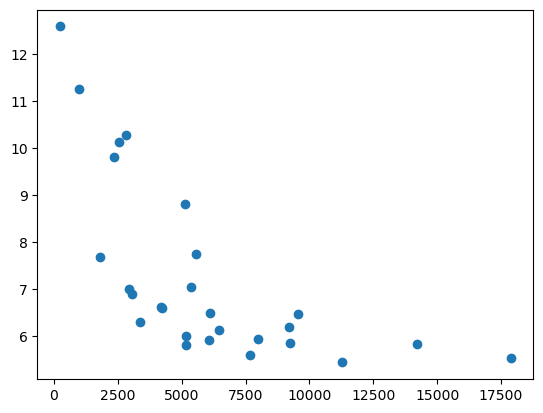

In [222]:
# Scatter plot
ac_unpr_x_values = ac_unpr_mean_df['Ac_Unpr']
ac_unpr_y_values = ac_unpr_mean_df['NatWalkInd']
plt.scatter(ac_unpr_x_values, ac_unpr_y_values)
plt.show()

The r-square-value is: 0.4297321977222915
The p-value is: 0.0002059120204109602


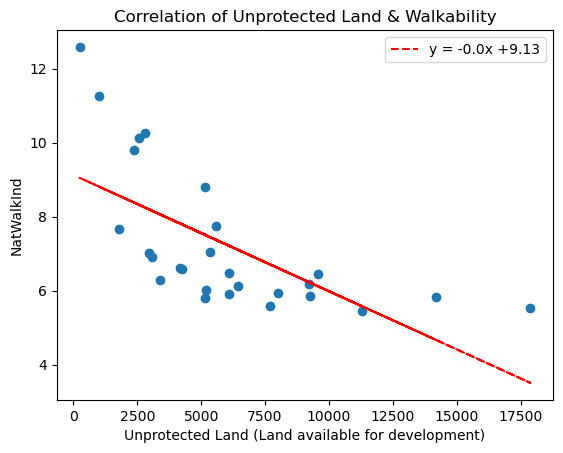

In [223]:
# Scatter plot
ac_unpr_x_values = ac_unpr_mean_df['Ac_Unpr']
ac_unpr_y_values = ac_unpr_mean_df['NatWalkInd']
plt.scatter(ac_unpr_x_values, ac_unpr_y_values)

# To do regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(ac_unpr_x_values, ac_unpr_y_values)
y_predicted_values = ac_unpr_x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(ac_unpr_x_values, y_predicted_values,"r--", label = line_equation)

plt.xlabel('Unprotected Land (Land available for development)')
plt.ylabel('NatWalkInd')
plt.title("Correlation of Unprotected Land & Walkability")

print(f"The r-square-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.legend()
plt.show()